In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt


In [2]:

DB_CONFIG = {
    'host': 'localhost',
    'database': 'SQLTEST',
    'user': 'postgres',
    'password': 'Admin'
}


In [3]:
query = """
WITH CompletedOrders AS (
    SELECT 
        COUNT(*) AS completed_order_count
    FROM 
        orders
    WHERE 
        status = 'COMPLETED' 
),
TotalGroupDeals AS (
    SELECT 
        COUNT(*) AS total_group_deal_count
    FROM 
        group_deals
)

SELECT 
    COALESCE(c.completed_order_count, 0) AS completed_orders,
    COALESCE(t.total_group_deal_count, 0) AS total_group_deals,
    CASE 
        WHEN COALESCE(t.total_group_deal_count, 0) = 0 THEN 0
        ELSE COALESCE(c.completed_order_count, 0) * 1.0 / t.total_group_deal_count
    END AS conversion_rate
FROM 
    CompletedOrders c,
    TotalGroupDeals t;
"""

In [4]:
try:
    conn = psycopg2.connect(**DB_CONFIG)
    cursor = conn.cursor()
    
    cursor.execute(query)
    data = cursor.fetchone()
    
    completed_orders = data[0]
    total_group_deals = data[1]
    conversion_rate = data[2]
    
    df = pd.DataFrame({
        'Metric': ['Completed Orders', 'Total Group Deals', 'Conversion Rate'],
        'Value': [completed_orders, total_group_deals, conversion_rate]
    })
finally:
    cursor.close()
    conn.close()


# Plot 1: Bar chart of completed orders and total group deals

Text(0, 0.5, 'Count')

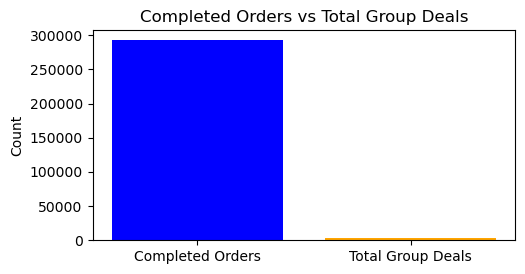

In [5]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.bar(df['Metric'][:2], df['Value'][:2], color=['blue', 'orange'])
plt.title('Completed Orders vs Total Group Deals')
plt.ylabel('Count')


# Plot 2: Pie chart of completed orders and total group deals

Text(0.5, 1.0, 'Distribution of Completed Orders and Total Group Deals')

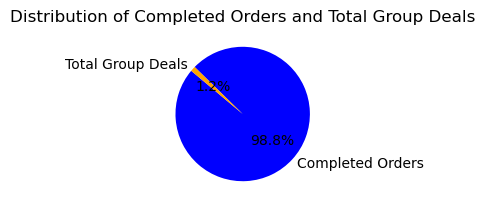

In [6]:
plt.subplot(2, 2, 2)
plt.pie(df['Value'][:2], labels=df['Metric'][:2], autopct='%1.1f%%', startangle=140, colors=['blue', 'orange'])
plt.title('Distribution of Completed Orders and Total Group Deals')


# Plot 3: Conversion rate as a bar

Text(0, 0.5, 'Rate')

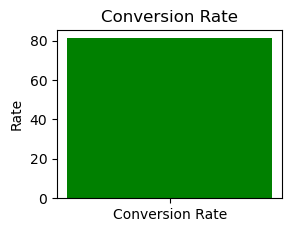

In [7]:


plt.subplot(2, 2, 3)
plt.bar(['Conversion Rate'], [conversion_rate], color='green')
plt.title('Conversion Rate')
plt.ylabel('Rate')


# Plot 4: Horizontal bar chart of all metrics

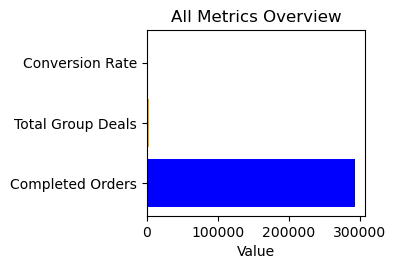

In [8]:

plt.subplot(2, 2, 4)
plt.barh(df['Metric'], df['Value'], color=['blue', 'orange', 'green'])
plt.title('All Metrics Overview')
plt.xlabel('Value')

plt.tight_layout()
plt.show()